<img style="float: right;" src="../htwlogo.jpg">

# Filtering and convolutions

**Author**: _Erik Rodner_<br>
**Lecture**: Computer Vision and Machine Learning I

In this notebook, we will have a look on convolutions and the effect of filtering. In this notebook, we will use scikit-image methods.

In [10]:
# let's check the scikit-image version - just to be sure
# we are using the right API (the following is tested with 0.17.2)
# Docs: https://scikit-image.org/docs/0.17.x/api/api.html
import skimage
skimage.__version__

'0.17.2'

In [54]:
# import our usual friends
from skimage.io import imread, imsave
import matplotlib.pylab as plt
import numpy as np
import skimage.data as examples
from skimage.color import rgb2gray
from scipy.ndimage import convolve
from skimage.filters import gaussian, sobel_h, sobel_v

In [38]:
img = rgb2gray(examples.astronaut())

## Box filters

Let's play with some box filters first and look at their effect on images

[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


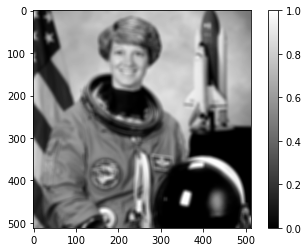

In [39]:
# let's define a box filter of size 9 by 9
s = 9
weights = np.ones((s,s))
print (weights)
# do not forget appropiate scaling
weights /= s*s
filtered_img = convolve(img, weights)
plt.gray() # we will deal with grayscale images and also want to show them properly
plt.imshow(filtered_img, vmin=0, vmax=1)
plt.colorbar()

## Gaussian filters

An alternative to box filters are Gaussian filters, which can be also theoretically motivated in different ways.
Simply speaking, it is quite reasonable that pixels further away from a central pixel receive a lower weight. Let's use an skimage function first.

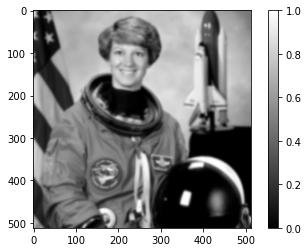

In [40]:
filtered_img = gaussian(img, sigma=2)
plt.imshow(filtered_img, vmin=0, vmax=1)
plt.colorbar()

But how does the filter mask look like? We can check this by filtering an image with a single impulse

Text(0.5, 1.0, 'Gaussian filter')

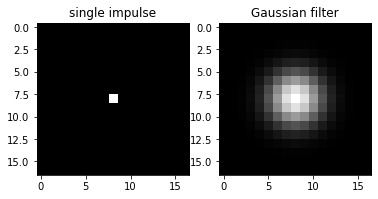

In [41]:
simple_img = np.zeros((17,17))
simple_img[8,8] = 1
G = gaussian(simple_img, sigma=2)
plt.subplot(1,2,1)
plt.imshow(simple_img)
plt.title("single impulse")
plt.subplot(1,2,2)
plt.imshow(G)
plt.title("Gaussian filter")

## Edge filters

After all of this smoothing, we would like to detect high-frequency elements of the images - edges!
We do this first, by applying simple gradient filters. Please have a close look to the filter masks - do they look right and identical to the ones in the lecture slides? What is the difference and why?

gx = 
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
gx = 
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


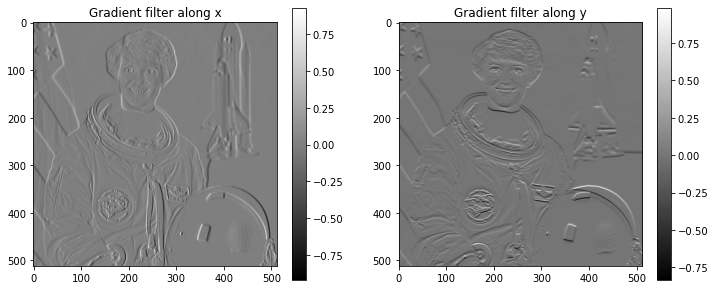

In [75]:
gx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
gy = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
print (f"gx = \n{gx}")
print (f"gx = \n{gy}")
# The filter masks need to be scaled with 3.0 since this is the sum of the positive parts.
img_x = convolve(img, gx/3.0)
img_y = convolve(img, gy/3.0)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_x)
plt.title("Gradient filter along x")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(img_y)
plt.title("Gradient filter along y")
plt.colorbar()

An alternative to gradient filters are sobel filters, which are indirectly performing a smoothing operation as well. In fact, they can be also realised by first applying a 1D-Gaussian filter and then a gradient filter - but this might be too much detail now.

sobel gx =
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel gx =
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


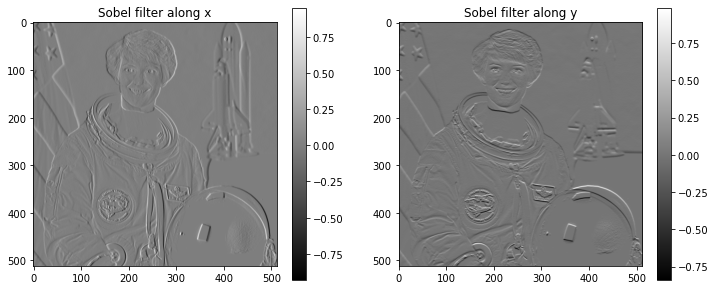

In [76]:
sobel_gx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
print (f"sobel gx =\n {sobel_gx}")
print (f"sobel gx =\n {sobel_gy}")
img_sx = convolve(img, sobel_gx/4.0)
img_sy = convolve(img, sobel_gy/4.0)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_sx)
plt.title("Sobel filter along x")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(img_sy)
plt.title("Sobel filter along y")
plt.colorbar()

We can do this of course also with the ```skimage``` routines.

In [69]:
img_sx_skimage = sobel_v(img)
img_sy_skimage = sobel_h(img)

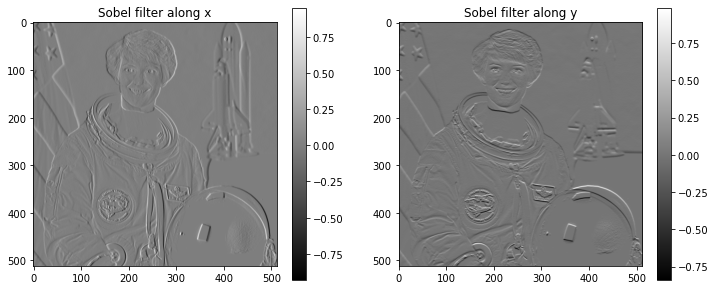

In [77]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_sx_skimage)
plt.title("Sobel filter along x")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(img_sy_skimage)
plt.title("Sobel filter along y")
plt.colorbar()

Often we simply care about the presence of the edge and not about their horizontal and vertical parts. We can do this by calculating the gradient magnitude. For visualization purposes we can also threshold the resulting image.

Text(0.5, 1.0, 'Gradient magnitude')

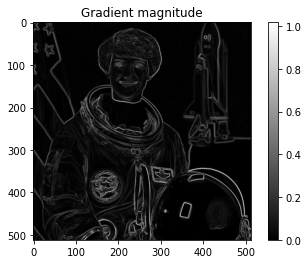

In [78]:
magn = np.sqrt(img_sx**2 + img_sy**2)
plt.imshow(magn)
plt.colorbar()
plt.title("Gradient magnitude")

Text(0.5, 1.0, 'Thresholded gradient magnitude')

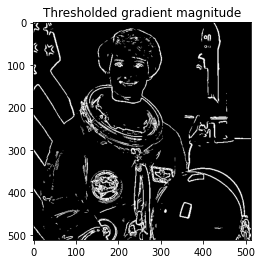

In [83]:
plt.imshow(magn>0.2)
plt.title("Thresholded gradient magnitude")